# Market Segmentation Analysis

# McDonald’s Dataset

Dataset: https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv
1. simple Dataset to learn the basics of Market Segmentation Analysis
2. data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY,CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,HEALTHY, and DISGUSTING.
3. Objective :To know if consumer segments exist that have a distinctly different image of McDonald’s and Group them together.


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Understanding the Dataset

In [8]:
df  = pd.read_csv('./mcdonalds.csv')
print('data dimensions ',df.shape)
print (df.columns)


data dimensions  (1453, 15)
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [9]:
#print first 5 rows of the dataset
print(df.head())

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


## Data Cleaning and Pre-processing


In [11]:
#check NaN Values
num_na = df.isna().sum()
print('nan values',num_na)

nan values yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


## Check unique values

In [12]:
def check_unique():
    for i in df:
        print(i,' ---- ', df[i].unique())

check_unique()

yummy  ----  ['No' 'Yes']
convenient  ----  ['Yes' 'No']
spicy  ----  ['No' 'Yes']
fattening  ----  ['Yes' 'No']
greasy  ----  ['No' 'Yes']
fast  ----  ['Yes' 'No']
cheap  ----  ['Yes' 'No']
tasty  ----  ['No' 'Yes']
expensive  ----  ['Yes' 'No']
healthy  ----  ['No' 'Yes']
disgusting  ----  ['No' 'Yes']
Like  ----  ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Age  ----  [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency  ----  ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender  ----  ['Female' 'Male']


In [13]:
df['Like'] = df['Like'].replace('I love it!+5','+5')
df['Like'] = df['Like'].replace('I hate it!-5','-5')
print('Like --- ', df['Like'].unique())

Like ---  ['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']


In [14]:
binary_columnns = [
    "yummy",
    "convenient",
    "spicy",
    "fattening",
    "greasy",
    "fast",
    "cheap",
    "tasty",
    "expensive",
    "healthy",
    "disgusting",
]
for col in binary_columnns:
    df[col] = df[col].replace({'Yes':1, 'No':0})

df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
check_unique()

yummy  ----  [0 1]
convenient  ----  [1 0]
spicy  ----  [0 1]
fattening  ----  [1 0]
greasy  ----  [0 1]
fast  ----  [1 0]
cheap  ----  [1 0]
tasty  ----  [0 1]
expensive  ----  [1 0]
healthy  ----  [0 1]
disgusting  ----  [0 1]
Like  ----  ['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']
Age  ----  [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency  ----  ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender  ----  [0 1]


In [15]:
print('Mean values of all the binary columns')
print(df.mean())

Mean values of all the binary columns
yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Age           44.604955
Gender         0.457674
dtype: float64


In [16]:
segment_df = df[binary_columnns]
# segment_df['Age'] = (df['Age'] - df['Age'].mean())/(df['Age'].std())
print(segment_df.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


## Principle Component Analysis

In [17]:
pca = PCA(n_components=11)
pca.fit(segment_df)
print('Explained Variance Ratio by PCs ',pca.explained_variance_ratio_)

Explained Variance Ratio by PCs  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [18]:
out = pca.transform(segment_df)
plot_data = out[:,0:2]
components = pca.components_
# print('components type is ', type(components))
# print('components shape is ', components.shape)
# print(components)
plot_components = components[0:2,:]
print('plot components shape is ', plot_components.shape)
print('plot component values ',plot_components)


plot components shape is  (2, 11)
plot component values  [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]]


Text(0,0.5,'PC2')

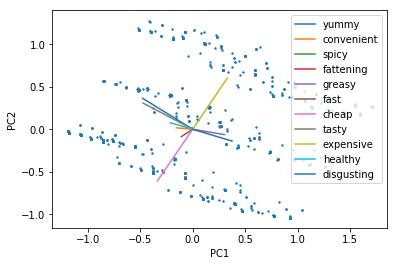

In [19]:
#plotting Scatter plot
plt.scatter(plot_data[:,0],plot_data[:,1],s=2, marker='o')
for i in range(11):
    plt.plot([0,plot_components[0,i]],[0,plot_components[1,i]], label=binary_columnns[i])
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

## Observations
1. features cheap and expensive are independent of each other , so it plays important role in evaluation.
2. fattening ,disgusting and creasing pointing in the same direction ,so consumers who views's Mc'donalds fattening ,disgusting also likley to views it as creasing.
3. fast ,convenint ,tasty ,yummy and healthy pointing in same direction and it is postive features.

In [20]:
#understading segmented dataframe:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
yummy         1453 non-null int64
convenient    1453 non-null int64
spicy         1453 non-null int64
fattening     1453 non-null int64
greasy        1453 non-null int64
fast          1453 non-null int64
cheap         1453 non-null int64
tasty         1453 non-null int64
expensive     1453 non-null int64
healthy       1453 non-null int64
disgusting    1453 non-null int64
dtypes: int64(11)
memory usage: 124.9 KB


In [21]:
segment_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Finding correlations between the columns

In [22]:
# Features Interpretablity
# To find the pairwise correlation of all columns in the dataframe.
# the less correalted columns make much more sense for evaluation of consumers group.
segment_df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


# #Heat Map

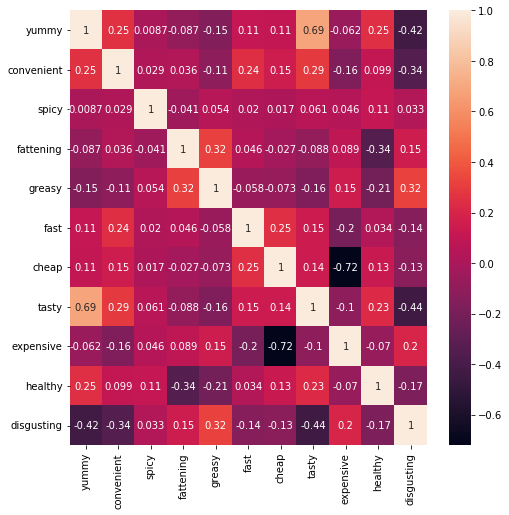

In [23]:
#Heat Map
import seaborn as sns #for plotting
plt.figure(figsize=(8,8))
sns.heatmap(segment_df.corr(), annot=True)
plt.show()

## Observations:
1. the attributes cheap and expensive are independent of each other beacuse have value -0.72
2. positive attributes like tasty and yummy have high values 0.69


# Grouping consumers

## K-Means: 

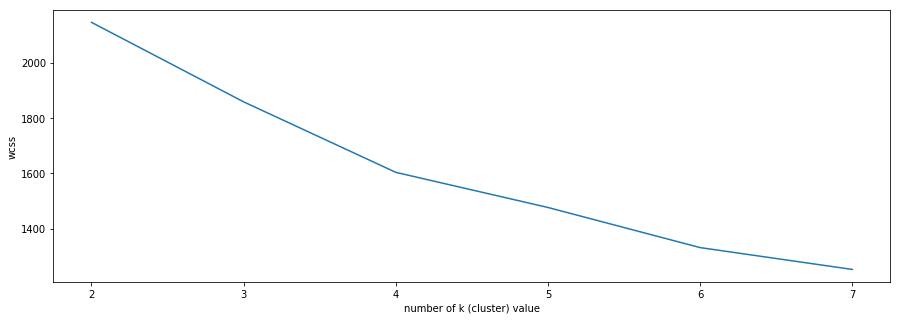

In [24]:
#Grouping consumers
#1 Applying K-Means with K=2 to k=8
from sklearn.cluster import KMeans

wcss = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(segment_df)
    wcss.append(kmeans.inertia_)
    
kmeans.cluster_centers_

# the best value is elbow value.
plt.figure(figsize=(15,5))
plt.plot(range(2,8),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

### Observations :
1. Using this Elbow method number of clusters can be determined.
2. we can choose 4 as a number of clusters.

## Hierarchical Clustering:

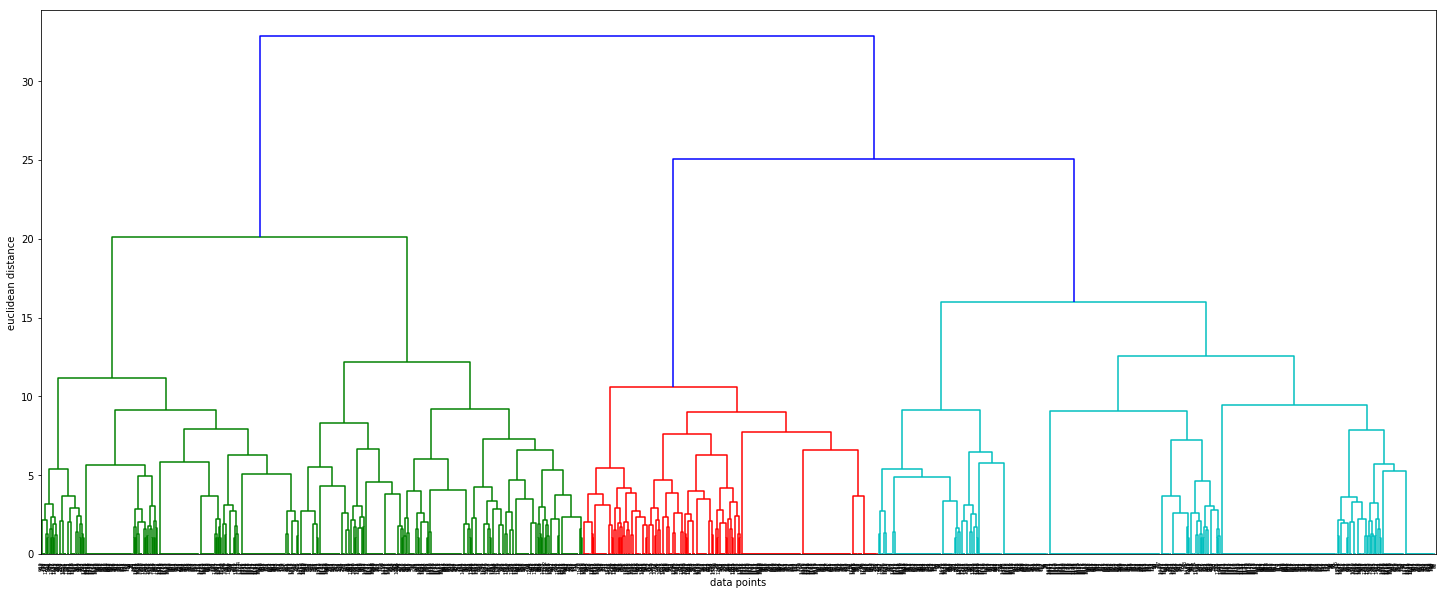

In [25]:
#Hierarchical Clustering
#create dendrogram and find the best clustering value
# ward distance = The distance between clusters is the sum of squared differences within all clusters
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

merg = linkage(segment_df,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()


### Observations :

1. Hierarchy clustering is a similarity measure or dist measure between clusters.
2. Dendogram can be used for visualizations,close clusters are merged together.
3. At y-axis between 4 and 5 corresponding to merging of datapoints in x- axis looks reasonable.
4. so it is good to grouped consumers in 4 clusters. 
